In [2]:
# importing geospatial libraries
import pandas as pd
import geopandas as gpd
import fiona; help(fiona.open)

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
# read and add shapefile to notebook using url
# tried using shp file but didnt work- ask q
url = "https://www.treasurer.ca.gov/ctcac/opportunity/2023/final_2023_shapefile.zip"
TCAC = gpd.read_file(url)



In [4]:
#data type
type(TCAC)

geopandas.geodataframe.GeoDataFrame

In [5]:
# checking out the data
TCAC.head()

,fips,fips_bg,cnty_nm,countyd,region,ecn_dmn,env_hl_,ed_domn,index,oppcat,geometry
0,06001400100,None,Alameda,06001,Bay Area Region,0.796927,0.927856,0.787575,0.590095,Highest Resource,"POLYGON ((-122.23418 37.85254, -122.23428 37.8..."
1,06001400200,None,Alameda,06001,Bay Area Region,0.960588,0.627255,0.810955,0.701320,Highest Resource,"POLYGON ((-122.25253 37.85110, -122.25094 37.8..."
2,06001400300,None,Alameda,06001,Bay Area Region,0.927188,0.619238,0.324649,0.210942,High Resource,"POLYGON ((-122.26417 37.83787, -122.26427 37.8..."
3,06001400400,None,Alameda,06001,Bay Area Region,0.872411,0.657983,0.523046,0.358539,High Resource,"POLYGON ((-122.26081 37.84869, -122.26023 37.8..."
4,06001400500,None,Alameda,06001,Bay Area Region,0.759519,0.698063,0.566466,0.310218,High Resource,"POLYGON ((-122.26023 37.85274, -122.26081 37.8..."


In [6]:
# no. of rows and columns
TCAC.shape

(10136, 11)

In [7]:
TCAC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [8]:
TCAC.dtypes

fips          object
fips_bg       object
cnty_nm       object
countyd       object
region        object
ecn_dmn      float64
env_hl_      float64
ed_domn      float64
index        float64
oppcat        object
geometry    geometry
dtype: object

In [9]:
TCAC.columns.to_list()

['fips',
 'fips_bg',
 'cnty_nm',
 'countyd',
 'region',
 'ecn_dmn',
 'env_hl_',
 'ed_domn',
 'index',
 'oppcat',
 'geometry']

In [10]:
#seeing only county names
TCAC['cnty_nm'].sample(5)

5966      Riverside
2245    Los Angeles
3901    Los Angeles
1440       Imperial
4999         Orange
Name: cnty_nm, dtype: object

In [11]:
# listing counties 
TCAC['cnty_nm'].value_counts()

Los Angeles        2365
San Diego           685
Orange              583
Riverside           509
San Bernardino      472
Santa Clara         378
Alameda             361
Sacramento          335
Fresno              315
Kern                235
Contra Costa        213
Sonoma              197
San Francisco       196
Ventura             195
Butte               195
Tulare              174
San Joaquin         174
San Mateo           172
Stanislaus          159
Monterey            141
Placer              137
Shasta              131
San Luis Obispo     118
Santa Barbara       117
Solano              112
Humboldt            108
Merced               98
El Dorado            92
Santa Cruz           89
Mendocino            79
Nevada               75
Imperial             70
Marin                67
Napa                 63
Sutter               62
Madera               59
Kings                57
Yolo                 51
Yuba                 49
Lake                 48
Tuolumne             48
Tehama          

In [12]:
#saving it as a variable
TCAC_county = TCAC['cnty_nm'].value_counts()
TCAC_county

Los Angeles        2365
San Diego           685
Orange              583
Riverside           509
San Bernardino      472
Santa Clara         378
Alameda             361
Sacramento          335
Fresno              315
Kern                235
Contra Costa        213
Sonoma              197
San Francisco       196
Ventura             195
Butte               195
Tulare              174
San Joaquin         174
San Mateo           172
Stanislaus          159
Monterey            141
Placer              137
Shasta              131
San Luis Obispo     118
Santa Barbara       117
Solano              112
Humboldt            108
Merced               98
El Dorado            92
Santa Cruz           89
Mendocino            79
Nevada               75
Imperial             70
Marin                67
Napa                 63
Sutter               62
Madera               59
Kings                57
Yolo                 51
Yuba                 49
Lake                 48
Tuolumne             48
Tehama          

In [13]:
type(TCAC_county)

pandas.core.series.Series

In [14]:
#changing type of data
TCAC_county = TCAC_county.reset_index()

In [15]:
type(TCAC_county)

pandas.core.frame.DataFrame

In [16]:
#trimming data
TCAC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [17]:
#showing desired columns of county name, opportunity and geometry
TCAC[['cnty_nm','oppcat','geometry']]

,cnty_nm,oppcat,geometry
0,Alameda,Highest Resource,"POLYGON ((-122.23418 37.85254, -122.23428 37.8..."
1,Alameda,Highest Resource,"POLYGON ((-122.25253 37.85110, -122.25094 37.8..."
2,Alameda,High Resource,"POLYGON ((-122.26417 37.83787, -122.26427 37.8..."
3,Alameda,High Resource,"POLYGON ((-122.26081 37.84869, -122.26023 37.8..."
4,Alameda,High Resource,"POLYGON ((-122.26023 37.85274, -122.26081 37.8..."
...,...,...,...
10131,Yuba,None,"POLYGON ((-121.63631 39.24941, -121.63581 39.2..."
10132,Yuba,Moderate Resource,"POLYGON ((-121.27892 39.49773, -121.27724 39.5..."
10133,Yuba,Highest Resource,"POLYGON ((-121.32330 39.36354, -121.32129 39.3..."
10134,Yuba,Moderate Resource,"POLYGON ((-121.28387 39.46216, -121.27864 39.4..."


In [18]:
#creating a list of desired columns
desired_columns =['cnty_nm','oppcat','geometry']
desired_columns

['cnty_nm', 'oppcat', 'geometry']

In [19]:
desired_columns.info

AttributeError: 'list' object has no attribute 'info'

In [20]:
#trimming data to the 3 desired columns
TCAC_cleared = TCAC[desired_columns].copy()
TCAC_cleared

,cnty_nm,oppcat,geometry
0,Alameda,Highest Resource,"POLYGON ((-122.23418 37.85254, -122.23428 37.8..."
1,Alameda,Highest Resource,"POLYGON ((-122.25253 37.85110, -122.25094 37.8..."
2,Alameda,High Resource,"POLYGON ((-122.26417 37.83787, -122.26427 37.8..."
3,Alameda,High Resource,"POLYGON ((-122.26081 37.84869, -122.26023 37.8..."
4,Alameda,High Resource,"POLYGON ((-122.26023 37.85274, -122.26081 37.8..."
...,...,...,...
10131,Yuba,None,"POLYGON ((-121.63631 39.24941, -121.63581 39.2..."
10132,Yuba,Moderate Resource,"POLYGON ((-121.27892 39.49773, -121.27724 39.5..."
10133,Yuba,Highest Resource,"POLYGON ((-121.32330 39.36354, -121.32129 39.3..."
10134,Yuba,Moderate Resource,"POLYGON ((-121.28387 39.46216, -121.27864 39.4..."


In [21]:
#filtering to show only los angeles county data
TCAC_cleared.loc[TCAC_cleared['cnty_nm'] == 'Los Angeles']
LA = TCAC_cleared.loc[TCAC_cleared['cnty_nm'] == 'Los Angeles']

In [22]:
LA

,cnty_nm,oppcat,geometry
1858,Los Angeles,Moderate Resource,"POLYGON ((-118.28862 34.25591, -118.29104 34.2..."
1859,Los Angeles,High Resource,"POLYGON ((-118.27728 34.26196, -118.27742 34.2..."
1860,Los Angeles,Moderate Resource,"POLYGON ((-118.28862 34.24861, -118.28968 34.2..."
1861,Los Angeles,Moderate Resource,"POLYGON ((-118.27802 34.24961, -118.27712 34.2..."
1862,Los Angeles,High Resource,"POLYGON ((-118.27728 34.25991, -118.26529 34.2..."
...,...,...,...
4218,Los Angeles,None,"POLYGON ((-118.43001 33.91677, -118.42991 33.9..."
4219,Los Angeles,None,"POLYGON ((-118.26359 33.70463, -118.27475 33.7..."
4220,Los Angeles,None,"POLYGON ((-118.18207 33.72302, -118.20623 33.7..."
4221,Los Angeles,None,"POLYGON ((-118.41149 33.79360, -118.41142 33.7..."


In [23]:
LA["geometry"]

1858    POLYGON ((-118.28862 34.25591, -118.29104 34.2...
1859    POLYGON ((-118.27728 34.26196, -118.27742 34.2...
1860    POLYGON ((-118.28862 34.24861, -118.28968 34.2...
1861    POLYGON ((-118.27802 34.24961, -118.27712 34.2...
1862    POLYGON ((-118.27728 34.25991, -118.26529 34.2...
                              ...                        
4218    POLYGON ((-118.43001 33.91677, -118.42991 33.9...
4219    POLYGON ((-118.26359 33.70463, -118.27475 33.7...
4220    POLYGON ((-118.18207 33.72302, -118.20623 33.7...
4221    POLYGON ((-118.41149 33.79360, -118.41142 33.7...
4222    POLYGON ((-118.23194 33.71062, -118.25869 33.7...
Name: geometry, Length: 2365, dtype: geometry

In [24]:
type(LA)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

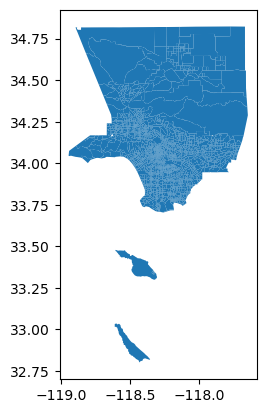

In [25]:
#plotting only LA county
LA.plot()

<AxesSubplot: >

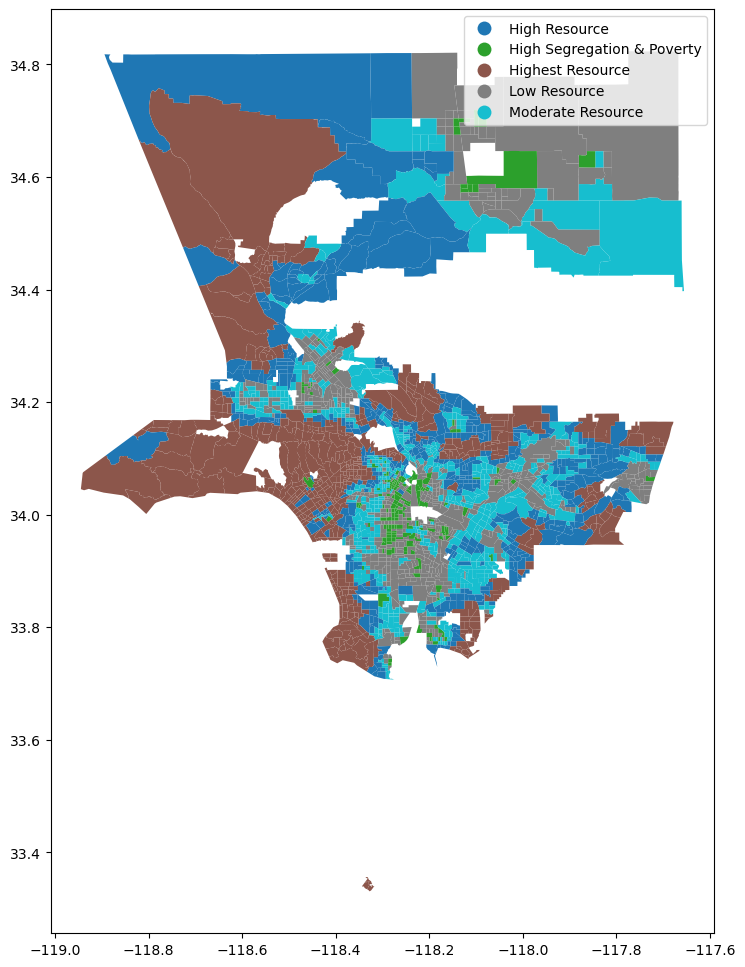

In [26]:
#adding colour to the plot
LA.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default). WHAT ARE THE DIMENSION UNITS?
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [27]:
#mapping with folium
import folium
import matplotlib.pyplot as plt
import shapely

In [28]:
m = folium.Map()
m

In [29]:
#finding the centre of the LA plot to print on folium
x1,y1,x2,y2 = LA['geometry'].total_bounds
print(x1,y1,x2,y2)

-118.944887236112 32.801462 -117.646374 34.823301


In [30]:
m = folium.Map(tiles='openstreetmap')
m.fit_bounds([[-118.944887236112, 32.801462], [-117.646374, 34.823301]])
folium.GeoJson(LA["geometry"]).add_to(m)

In [31]:
#got the mean using the average of lat and long mentioned above
m = folium.Map(location=[33.8123815,-118.295630618056])
m

In [34]:
#trying to make a choropleth map but unsuccessul
